<a href="https://colab.research.google.com/github/pkotangale/ML-end_to_end_project/blob/main/Project_Carprice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<img src="https://www.cars24.com/blog/wp-content/uploads/2017/02/shutterstock_494764837.jpg">

In [4]:
#I have used the raw link for the csv file from my github repositiory.
url = 'https://raw.githubusercontent.com/pkotangale/project_usedcarsellingprice/main/car_dataset.csv'
#read this file with the help of pandas.
dataset = pd.read_csv(url)

#if you have already downloaded the csv file into our project folder then use :
# dataset = pd.read_csv("car_dataset.csv")

#print first five rows of the dataset
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
dataset.shape

(301, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Feature Engineering

In [9]:
#adding a column with the current year
dataset['Current_Year']=2020
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [10]:
#creating a new column which will be age of vehicles; new feature
dataset['Vehicle_Age']=dataset['Current_Year'] - dataset['Year']
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [11]:
#getting dummies for these columns with help of pandas library
dataset=pd.get_dummies(dataset,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

#dropping the columns which are redundant and irrelevant
dataset.drop(columns=['Year'],inplace=True)
dataset.drop(columns=['Current_Year'],inplace=True)
dataset.drop(columns=['Car_Name'],inplace=True)

#check out the dataset with new changes
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,3.35,5.59,27000,0,6,0,1,1,0
1,4.75,9.54,43000,0,7,1,0,1,0
2,7.25,9.85,6900,0,3,0,1,1,0
3,2.85,4.15,5200,0,9,0,1,1,0
4,4.60,6.87,42450,0,6,1,0,1,0


Fuel_Type feature:
Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1
Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0
Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0
Transmission feature:
transmission is manual if Transmission_Manual = 1
transmission is automatic if Transmission_Manual = 0
Seller_Type feature:
Seller_Type is Individual if Seller_Type_Individual = 1
Seller_Type is dealer if Seller_Type_Individual = 0

Features and target variable

In [12]:
# taking all the features except "selling price"
X=dataset.iloc[:,1:]
# taking "selling price" as y , as it is our target variable
y=dataset.iloc[:,0]

Feature Importance

In [13]:
#checking and comparing the importance of features
from sklearn.ensemble import ExtraTreesRegressor
#creating object
model = ExtraTreesRegressor()
#fit the model
model.fit(X,y)

print(model.feature_importances_)

[0.36239996 0.04205498 0.00041036 0.07755803 0.23207903 0.0090743
 0.13937306 0.13705029]


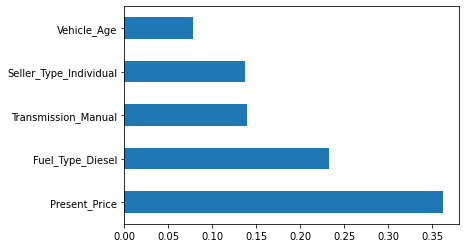

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# considering top 5 important features
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


Splitting data into training and testing

In [15]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Fitting and evaluating different models

Fitting and evaluating different models
Here I am using three models :

1. Linear Regression
2. Decision Tree
3. Random forest Regressor
I will fit these models and then choose one with the better accuracy. You can use any regression model as per your choice.

https://builtin.com/data-science/random-forest-algorithm

Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
#creating object for linear regression
reg=LinearRegression()
#fitting the linear regression model
reg.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

#metrics
from sklearn import metrics
#print mean absolute error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print mean squared error
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#print the root mean squared error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print R2 metrics score
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 1.2426713915033711
MSE: 4.432128265667621
RMSE: 2.1052620420431327
R2: 0.8517983059778262


Decision tree Model

In [17]:
from sklearn.tree import DecisionTreeRegressor

#creating object for Decision tree
tree = DecisionTreeRegressor()

#fitting the decision tree model
tree.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = tree.predict(X_test)

#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.8181318681318681
MSE: 2.4697219780219783
RMSE: 1.571534911486849
R2: 0.9174173311404568


Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestRegressor

#creating object for Random forest regressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#fitting the rf model
rf.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = rf.predict(X_test)

#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.7551296703296704
MSE: 2.6380509257142837
RMSE: 1.6242077840332756
R2: 0.9117887406066014


We want our R2 score to be maximum and other errors to be minimum for better results

Random forest regressor is giving better results. therefore we will hypertune this model and then fit, predict.

#Hyperparamter tuning

In [19]:
#n_estimators = The number of trees in the forest.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [20]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [21]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [23]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [24]:
#fit the random forest model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [25]:
#displaying the best parameters
rf_random.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [26]:
rf_random.best_score_

-3.6104201560167604

Final Predictions

In [27]:
#predicting against test data
y_pred=rf_random.predict(X_test)
#print the erros
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.7787404419191923
MSE: 2.581342537446687
RMSE: 1.6066556997212211
R2: 0.9136849581126755


Save the model

In [28]:
import pickle
# open a file, where you ant to store the data
file = open('car_price_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [29]:
!pip install jsonify

  Created wheel for jsonify: filename=jsonify-0.5-cp36-none-any.whl size=1564 sha256=efd9fafa0e93d61855a4536726f8ebe9bccaa525efca32249e360fb87ab845fe
  Stored in directory: /root/.cache/pip/wheels/ba/51/8a/136c19b604769b6cb4946fc3402a7068d86fe1f43f8824e2bf
Successfully built jsonify


In [ ]:
!mkdir '/content/templates'
!mkdir '/content/uploads'

In [30]:
!pip install flask gevent requests pillow flask-ngrok

     |████████████████████████████████| 5.9MB 7.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 245kB 52.4MB/s 
  Using cached https://files.pythonhosted.org/packages/22/e2/9fbb24cf1ee89813ded3761314562a83a2822ad2bf5682eef0d0c99e2a5d/greenlet-1.0.0-cp36-cp36m-manylinux2010_x86_64.whl
  Created wheel for gevent: filename=gevent-21.1.1-cp36-cp36m-linux_x86_64.whl size=4543953 sha256=29e92c60abc9b6e3ba902fdc4a0378d30bcfe0a57137fa5d4bec6ed4438e705e
  Stored in directory: /root/.cache/pip/wheels/d6/93/ae/3f1b8b4555563d7a4d494c3e6e207502a0f6817b0e15bb7d08
Successfully built gevent


In [31]:
import os
import numpy as np
from flask import Flask, request, redirect, url_for, render_template
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from flask_ngrok import run_with_ngrok
import keras
import jsonify
import pickle
import sklearn
from sklearn.preprocessing import StandardScaler

In [ ]:
#create index.html file in folder template 
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Car_Price_prediction</title>
    </head>
    
<!-- Adding styles like colour, height, width, border to our html page -->
<style>


input[type=text], select {
  width: 80%;
  padding: 12px 20px;
  margin: 8px 0;
  display: inline-block;
  border-radius: 4px;
  box-sizing: border-box;
  font-weight: bolder;
}

input[type=submit] {
  width: 80%;
  background-color: goldenrod;
  color:black;
  padding: 14px 20px;
  margin: 8px 0;
  border: none;
  border-radius: 10px;
  cursor: pointer;
  font-size:100;
  font-weight: bolder;
}


input[type=submit]:hover {
  background-color: orangered;
}
form{
    border-radius: 10px;
    padding-top: 5%;
    font-weight: bolder;
}
div {
 
  border-radius: 5px;
  margin-left: 35%;
  width: 30%;
  
}
h1{
    color: goldenrod;
    font-size: 40px;
    font-weight: bolder;
}
h3{
  color: red;
}

body {
            
            background-image: url("https://www.spinny.com/blog/wp-content/uploads/2017/03/sellACar-1.jpg");
            background-repeat: no-repeat;
            background-size: cover;
            text-align: center;
            padding: 0px;
        }
       
</style>

<body>

<h1>Car Price Prediction</h1>

<div>
 <!-- Html form which will get all the values from user -->
 <form action="{{ url_for('predict')}}" method="post" style="background-color:#E6E6FA">

<label for="Year">Year of Purchase</label><br>
<input type="text" id="Year" name="Year" placeholder="2014" required="required"><br>
<label for="Present_Price">Showroom Price(in lakhs)</label><br>
<input type="text" id="Present_Price" name="Present_Price" placeholder="3.4" required="required"><br>
<label for="Kms_Driven">Kilometers Drived</label><br>
<input type="text" id="Kms_Driven" name="Kms_Driven" placeholder="24000" required="required"><br>
     
<!-- drop down options are provided for the categorical features -->
<label for="Owner">No. of owners</label><br>
<select id="owner" name="Owner">
      <option value="0">0</option>
      <option value="1">1</option>
      <option value="3">3</option>
    </select><br>
<label for="Fuel_Type_Petrol">Fuel</label><br>
    <select id="Fuel_Type_Petrol" name="Fuel_Type_Petrol" required="required">
      <option value="Petrol">petrol</option>
      <option value="Diesel">diesel</option>
      <option value="Cng">cng</option>
    </select><br>
<label for="Seller_Type_Individual">Owner type</label><br>
    <select id="Seller_Type_Individual" name="Seller_Type_Individual" required="required">
      <option value="dealer">dealer</option>
      <option value="individual">individual</option>
      </select><br>
<label for="Transmission_Mannual">Transmission type</label><br>
    <select id="Transmission_Mannual" name="Transmission_Mannual" required="required">
      <option value="mannual car">mannual car</option>
      <option value="automatic car">automatic car</option>
     </select> <br>
     
<!-- submit button -->           
<input type="submit" value="Calculate Selling Price">
</form>
</div>
    
<!-- the predicted text -->
<h3>{{ prediction_text }}</h3>

</body>
</html>

In [46]:
!mkdir "/content/templates"
!touch "/content/templates/index.html"

text = """<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Car_Price_prediction</title>
    </head>
    
<!-- Adding styles like colour, height, width, border to our html page -->
<style>


input[type=text], select {
  width: 80%;
  padding: 12px 20px;
  margin: 8px 0;
  display: inline-block;
  border-radius: 4px;
  box-sizing: border-box;
  font-weight: bolder;
}

input[type=submit] {
  width: 80%;
  background-color: goldenrod;
  color:black;
  padding: 14px 20px;
  margin: 8px 0;
  border: none;
  border-radius: 10px;
  cursor: pointer;
  font-size:100;
  font-weight: bolder;
}


input[type=submit]:hover {
  background-color: orangered;
}
form{
    border-radius: 10px;
    padding-top: 5%;
    font-weight: bolder;
}
div {
 
  border-radius: 5px;
  margin-left: 35%;
  width: 30%;
  
}
h1{
    color: goldenrod;
    font-size: 40px;
    font-weight: bolder;
}
h3{
  color: red;
}

body {
            
            background-image: url("https://www.spinny.com/blog/wp-content/uploads/2017/03/sellACar-1.jpg");
            background-repeat: no-repeat;
            background-size: cover;
            text-align: center;
            padding: 0px;
        }
       
</style>

<body>

<h1>Car Price Prediction</h1>

<div>
 <!-- Html form which will get all the values from user -->
 <form action="{{ url_for('predict')}}" method="post" style="background-color:#E6E6FA">

<label for="Year">Year of Purchase</label><br>
<input type="text" id="Year" name="Year" placeholder="2014" required="required"><br>
<label for="Present_Price">Showroom Price(in lakhs)</label><br>
<input type="text" id="Present_Price" name="Present_Price" placeholder="3.4" required="required"><br>
<label for="Kms_Driven">Kilometers Drived</label><br>
<input type="text" id="Kms_Driven" name="Kms_Driven" placeholder="24000" required="required"><br>
     
<!-- drop down options are provided for the categorical features -->
<label for="Owner">No. of owners</label><br>
<select id="owner" name="Owner">
      <option value="0">0</option>
      <option value="1">1</option>
      <option value="3">3</option>
    </select><br>
<label for="Fuel_Type_Petrol">Fuel</label><br>
    <select id="Fuel_Type_Petrol" name="Fuel_Type_Petrol" required="required">
      <option value="Petrol">petrol</option>
      <option value="Diesel">diesel</option>
      <option value="Cng">cng</option>
    </select><br>
<label for="Seller_Type_Individual">Owner type</label><br>
    <select id="Seller_Type_Individual" name="Seller_Type_Individual" required="required">
      <option value="dealer">dealer</option>
      <option value="individual">individual</option>
      </select><br>
<label for="Transmission_Mannual">Transmission type</label><br>
    <select id="Transmission_Mannual" name="Transmission_Mannual" required="required">
      <option value="mannual car">mannual car</option>
      <option value="automatic car">automatic car</option>
     </select> <br>
     
<!-- submit button -->           
<input type="submit" value="Calculate Selling Price">
</form>
</div>
    
<!-- the predicted text -->
<h3>{{ prediction_text }}</h3>

</body>
</html>"""
f  = open("/content/templates/index.html","a")
f.write(text)
f.close()

mkdir: cannot create directory ‘/content/templates’: File exists


In [47]:
app = Flask(__name__)
run_with_ngrok(app)#pass object to function for creating website

@app.route('/',methods=['GET'])
def Home():
  return render_template('index.html')
standard_to = StandardScaler()
#Predictions
#@app.route('/', methods=['POST'])
def load_models():
  global rf_random
#@app.route("/predict", methods=['POST'])
@app.route("/", methods=['POST'])
#define the predict function which is going to predict the results from ml model based on the given values through html form
def predict():
    #Fuel_type_Petrol is used in the html form and therefore we are initiating Fuel_Type_Diesel as zero 
    Fuel_Type_Diesel=0
    if request.method == 'POST':
      Year = int(request.form['Year'])
      Year = 2020 - Year
      Present_Price=float(request.form['Present_Price'])
      Kms_Driven=int(request.form['Kms_Driven'])
      Kms_Driven2=np.log(Kms_Driven)
      Owner=int(request.form['Owner'])
      Fuel_Type_Petrol=request.form['Fuel_Type_Petrol']
        
      #Fuel_Type(feature) is categorised into petrol, diesel, cng, therefore we have done one-hot encoding on it while building model 
      if (Fuel_Type_Petrol=='Petrol'):
        Fuel_Type_Petrol=1
        Fuel_Type_Diesel=0
      elif (Fuel_Type_Petrol=='Diesel'):
        Fuel_Type_Petrol=0
        Fuel_Type_Diesel=1
      else:
        Fuel_Type_Petrol=0
        Fuel_Type_Diesel=0
            
        #Seller_type(feature) is categorised into indivividual and dealer,therefore we have done one-hot encoding on it while building model
      Seller_Type_Individual=request.form['Seller_Type_Individual']
      if (Seller_Type_Individual=='Individual'):
        Seller_Type_Individual=1
      else:
        Seller_Type_Individual=0
            
        #Transmission mannual(feature) is categorised into mannual and automatic,therefore we have done one-hot encoding on it while building model
      Transmission_Mannual=request.form['Transmission_Mannual']
      if (Transmission_Mannual=='Mannual'):
        Transmission_Mannual=1
      else:
        Transmission_Mannual=0            

        prediction=rf_random.predict([[Present_Price,Kms_Driven2,Owner,Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Mannual]])
        output=round(prediction[0],2)
        
        
        #condition for invalid values
      if output<0:
        return render_template('index.html',prediction_text="Sorry you cannot sell this car")
         
        #condition for prediction when values are valid
      else:
        return render_template('index.html',prediction_text="You Can Sell the Car at {} lakhs".format(output))
        
    #html form to be displayed on screen when no values are inserted; without any output or prediction
    else:
      return render_template('index.html')


#Execute app
if __name__ == "__main__":
  load_models()
  app.run()
    
  